In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [2]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title,n_threads,sizegrid):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("sequential")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='grid search seq'),
        Patch(facecolor='blue', label='grid search parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nsize_grid : {sizegrid}\nruns: {len(data_for)}\ngranularity: {granularity}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [3]:

def plot_speedup(data_list, title, n_threads, size_queue, size_grid, granularity):
    fig, ax = plt.subplots(figsize=[16, 8])

    # Mediane dei dati
    data_median = [np.median(datum) for datum in data_list]

    # Calcolo speedup
    speedup = np.array([data_median[0] / data_median[i+1] for i in range(len(n_threads))])

    # Linea speedup + marker
    ax.plot(n_threads, speedup, 'o--', color='blue', label='speedup')

    # Linea massimo speedup teorico (speedup = n_threads)
    ax.plot(n_threads, n_threads, 'r--', label='maximum')

    ax.set_title(title, loc='left')
    ax.set_xscale('log', base=2)  # log2 sull'asse x
    ax.set_xticks(n_threads)
    ax.set_xticklabels([str(n) for n in n_threads], rotation=45)
    ax.set_yscale('log', base=2)
    ax.set(xlabel='Workers (threads)', ylabel='Speedup')
    ax.legend()

    plt.figtext(0.7, 0.9, 
                f"threadpool: size_queue({size_queue})\nsize_grid: {size_grid}\nruns: {len(data_list[0])}\ngranularity: {granularity}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

    # Print valori di speedup
    print("\n=== Speedup values ===")
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")
    print("======================\n")

    

## prestazioni ggrid search parallel

In [4]:
#a mano settali uguali a come runnato in cluster 
#set parameter
n_runs = 10
n_threads = [1,2,4,8,16,32,64,96]
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = -1
funzione = "rastrigin"



In [5]:
# === THREAD SEQUENZIALE ===
grid_search_200000_seq = [8252, 8303, 8283, 8179, 8180, 8196, 8187, 8165, 8187, 8184, 8183, 8177, 8179, 8170, 8188, 8174, 8185, 8204, 8174, 8249, 8194, 8287, 8183, 8173, 8175, 8182, 8198, 8185, 8254, 8187]
grid_search_400000_seq = [16419, 16400, 16417, 16383, 16434, 16396, 16398, 16399, 16465, 16523, 16416, 16405, 16394, 16386, 16511, 16589, 16431, 16431, 16387, 16469, 16393, 16467, 16415, 16401, 16390, 16403, 16412, 16413, 16394, 16393]
grid_search_800000_seq = [32773, 32769, 32898, 32905, 32887, 32812, 32868, 32762, 32757, 32866, 32808, 32758, 32802, 32872, 32760, 32856, 32770, 32893, 32776, 32775, 32761, 32776, 32791, 32773, 32774, 32776, 32854, 32805, 32797, 32762]
grid_search_1600000_seq = [65660, 65767, 65775, 65612, 65633, 65614, 65716, 65585, 65638, 65589, 65666, 65618, 65643, 65672, 65586, 65643, 65606, 65702, 65661, 65681, 65638, 65603, 65670, 65728, 65605, 65643, 65631, 65578, 65578, 65600]
grid_search_3200000_seq = [131400, 131347, 131397, 131617, 131150, 131435, 131226, 131435, 131443, 131354, 131240, 131356, 131427, 131353, 131257, 131228, 131585, 131472, 131354, 131195]
grid_search_6400000_seq = [262500, 262543, 262852, 262561, 262475, 262439, 262417, 262489, 262286, 262710, 262685, 262577, 262623, 262407, 262420, 262520, 262390, 262577, 262592, 262324]
grid_search_12800000_seq = [525237, 525044, 525104, 525558, 525021, 525310, 524966, 524993, 524953, 525182, 525162, 525650, 524825, 525489, 525146, 525362, 525160, 525084, 525101, 524934]

# === THREAD 1 ===
grid_search_200000_thread1 = [8955,8975,8816,8801,8667,8988,8905,9011,8907,8883,8911,8941,8900,8988,8928,9057,8659,8945,9113,9088]
grid_search_400000_thread1 = [17759,17352,17459,17384,17491,17556,17246,17548,17692,17701,17332,17548,17414,17676,17505,17364,17488,17475,17666,17417]
grid_search_800000_thread1 = [34003,34280,34294,34425,34353,34639,34584,34452,34304,34188,34514,34212,34711,34273,34689,33997,34288,34548,34483,34398]
grid_search_1600000_thread1 = [68774,68326,68681,68146,68697,68179,68164,67964,68254,68720]
grid_search_3200000_thread1 = [136258,136203,136007,136322,136091,135999,136158,136322,136009,136078]
grid_search_6400000_thread1 = [271774,271409,271510,271852,271503,272021,271818,271859,271205,271767]
grid_search_12800000_thread1 = [542568,542599,543936,542690,543641,542579,543712,542691,543640,542195]

# === THREAD 2 ===
grid_search_200000_thread2 = [4795,4648,4808,5132,4305,4292,4240,4201,4204,4419,4569,4562,4210,4419,4548,4880,4207,4203,4395,4670]
grid_search_400000_thread2 = [8626,8788,8789,8537,8923,8769,8602,8778,8803,8372,8667,8769,8588,8454,8747,8679,9220,9042,8828,8857]
grid_search_800000_thread2 = [16986,17535,17223,17018,17284,17292,17098,17052,16924,17397,17139,17058,17445,17361,17108,17081,17546,17256,17353,17235]
grid_search_1600000_thread2 = [33884,33864,33904,33831,33879,33914,34026,34099,33897,33819]
grid_search_3200000_thread2 = [67092,66757,67323,67238,67372,67216,67111,67464,67267,67118]
grid_search_6400000_thread2 = [133984,134041,134000,134049,133959,134018,134288,134197,133869,134316]
grid_search_12800000_thread2 = [267582,267596,266957,267531,267004,267621,267080,267417,267216,267468]

# === THREAD 4 ===
grid_search_200000_thread4 = [2519,2462,2379,2153,2368,2143,2471,2449,2143,2349,2487,2482,2479,2567,2170,2152,2370,2485,2278,2420]
grid_search_400000_thread4 = [4320,4680,4589,4547,4427,4287,4259,4226,4904,4220,4370,4458,4228,4457,4243,4245,4554,4570,4436,4421]
grid_search_800000_thread4 = [8669,8962,8699,8832,9134,8703,9038,8889,8785,8412,8944,8398,8473,8832,8543,8688,8470,8822,8552,8822]
grid_search_1600000_thread4 = [17409,17043,17333,16736,17163,16831,16742,16935,17132,17022]
grid_search_3200000_thread4 = [34622,33652,34092,34274,33827,33810,33849,33862,34113,33415]
grid_search_6400000_thread4 = [67409,68243,67286,67582,66857,67134,67116,67186,67312,67158]
grid_search_12800000_thread4 = [133995,133769,134127,134793,134084,134110,134894,134491,134319,134363]

# === THREAD 8 ===
grid_search_200000_thread8 = [1858,1222,1337,1308,1111,1234,1407,1298,1231,1088,1110,1232,1093,1242,1113,1083,1115,1114,1093,1155]
grid_search_400000_thread8 = [2437,2279,2173,2434,2327,2160,2155,2171,2153,2208,2395,2143,2224,2162,2137,2267,2182,2303,2188,2174]
grid_search_800000_thread8 = [4485,4528,4333,4390,4311,4364,4443,4307,4302,4487,4570,4284,4262,4275,4459,4480,4291,4272,4319,4366]
grid_search_1600000_thread8 = [9017,8739,8710,8682,8700,8518,8740,8735,8681,8749]
grid_search_3200000_thread8 = [17345,17310,17113,17229,17117,17023,17168,17087,17238,17126]
grid_search_6400000_thread8 = [34022,34314,34678,34108,34235,42256,34244,33924,42272,34231]
grid_search_12800000_thread8 = [68038,68520,77356,67969,68041,68137,75498,68136,68098,68642]

# === THREAD 16 ===
grid_search_200000_thread16 = [1548,736,720,599,722,703,750,703,706,718,701,925,731,700,728,642,715,604,712,648]
grid_search_400000_thread16 = [1394,1381,1119,1966,1364,1301,1130,1389,1385,1366,1106,1352,1378,1388,1544,1359,1908,1391,1273,1370]
grid_search_800000_thread16 = [2422,2192,2678,2688,2699,2695,2693,3720,2688,2713,2694,2376,2686,2757,2326,2706,2733,3323,2718,2339]
grid_search_1600000_thread16 = [4965,4366,5331,5341,5341,5343,5336,5325,7879,5802]
grid_search_3200000_thread16 = [8924,10995,10734,10509,10480,10660,10643,10850,10848,10660]
grid_search_6400000_thread16 = [17557,17207,21826,19794,21226,21394,21209,21302,21171,21102]
grid_search_12800000_thread16 = [34520,42709,42380,42714,42578,41297,42413,42334,42597,46072,  34889 ,33982 ,41867 ,42057 ,41837 ,34146 ,41880 ,42145 ,41829 ,42244 ,41819 ,42288 ,42197 ,41913 ,42097 ,42053 ,41984 ,42268 ,41995 ,41952 ]# add test_cluster_1

# === THREAD 32 ===
grid_search_200000_thread32 = [1927,761,792,675,1267,709,662,1368,896,772,758,1052,1022,489,1001,445,669,884,810,598]
grid_search_400000_thread32 = [1189,1149,1285,1272,1390,1375,1319,766,2846,1147,2274,1177,1495,1351,1121,1330,1144,2635,1087,2153]
grid_search_800000_thread32 = [2892,2377,2566,2292,2243,2447,2529,2389,2666,3017,1465,2826,2471,2193,2328,3076,2423,5220,2018,2194]
grid_search_1600000_thread32 = [4730,5267,5141,2967,5371,4862,3552,4522,5860,4890]
grid_search_3200000_thread32 = [9558,8153,10424,10553,5539,5470,9564,8537,6595,8501]
grid_search_6400000_thread32 = [11126,14823,11089,15467,18157,10674,14899,13182,13061,13372]
grid_search_12800000_thread32 = [21728,24259,23816,28873,29250,29785,23721,22502,24157,25369]

# === THREAD 64 ===
grid_search_200000_thread64 = [6314,1273,1327,1394,798,1594,1538,1966,1291,1519,1200,1708,1163,1665,1030,1738,1353,1071,1312,1642]
grid_search_400000_thread64 = [1395,1992,2068,2019,2105,2902,2311,2149,2392,1817,1793,1722,2219,1453,1612,2738,2662,1528,1993,2545]
grid_search_800000_thread64 = [1867,4189,3029,4013,3989,3789,5134,3448,2350,2993,2038,2961,2166,2694,4538,2300,4205,2444,2617,4786]
grid_search_1600000_thread64 = [6469,6959,4483,4894,5367,6879,3955,4508,5165,5485]
grid_search_3200000_thread64 = [7807,5779,8473,8994,5611,9016,5944,8029,5406,8914]
grid_search_6400000_thread64 = [12883,14889,11972,10097,17413,10521,15900,15899,12289,15601]
grid_search_12800000_thread64 = [21716,20088,19350,27359,21231,25040,22460,27721,22286,20646]

# === THREAD 96 ===
grid_search_200000_thread96 = [8459,1352,1128,1963,1696,2696,1852,1772,997,1527,1801,1806,1468,1119,1296,1649,1515,1442,1143,1701]
grid_search_400000_thread96 = [2905,3333,2791,2479,1987,2878,2473,2340,2062,2388,3151,2932,2531,2078,1979,2785,1857,1667,2315,2288]
grid_search_800000_thread96 = [2518,5438,5863,3589,5258,3956,3641,4813,3752,4408,3496,6373,4679,4457,10007,4657,4313,7907,4549,4172]
grid_search_1600000_thread96 = [8742,10908,7820,7552,6210,4188,6664,4588,7921,10899]
grid_search_3200000_thread96 = [10055,12217,6454,11987,6763,10706,8939,13122,18216,12730]
grid_search_6400000_thread96 = [13251,15148,20070,20546,15853,16758,16079,16829,11757,14766]
grid_search_12800000_thread96 = [25039,22160,18609,25124,17648,24819,20784,20183,25970,19452]




## scalabilità forte


=== Median values (µs) ===
sequential: 525125.00
1: 542690.50
2: 267442.50
4: 134223.00
8: 68136.50
16: 42055.00
32: 24208.00
64: 22001.00
96: 21472.00


=== Speedup values ===
1 threads -> speedup: 0.97
2 threads -> speedup: 1.96
4 threads -> speedup: 3.91
8 threads -> speedup: 7.71
16 threads -> speedup: 12.49
32 threads -> speedup: 21.69
64 threads -> speedup: 23.87
96 threads -> speedup: 24.46



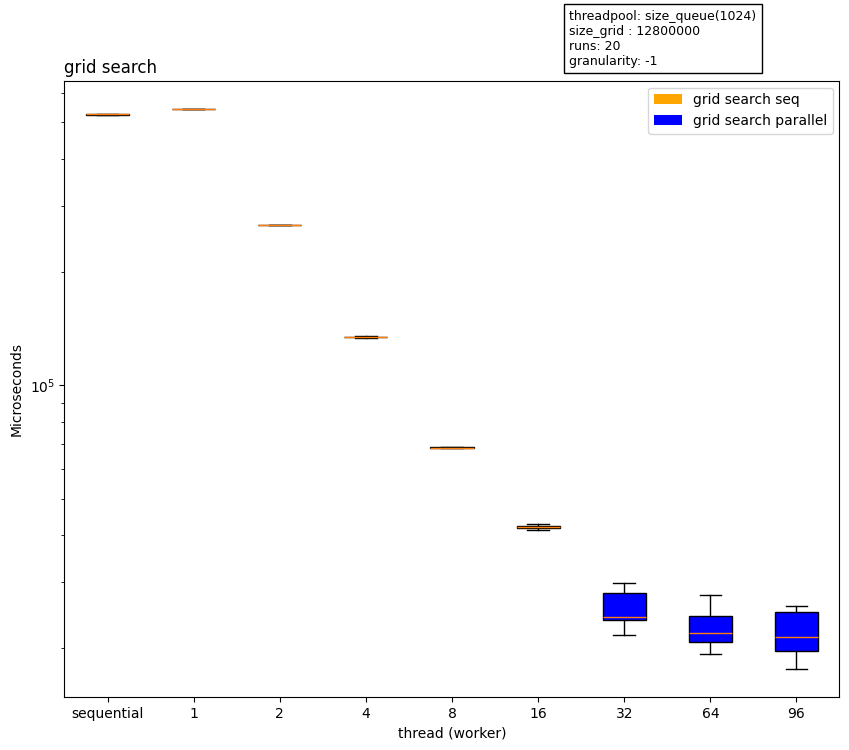

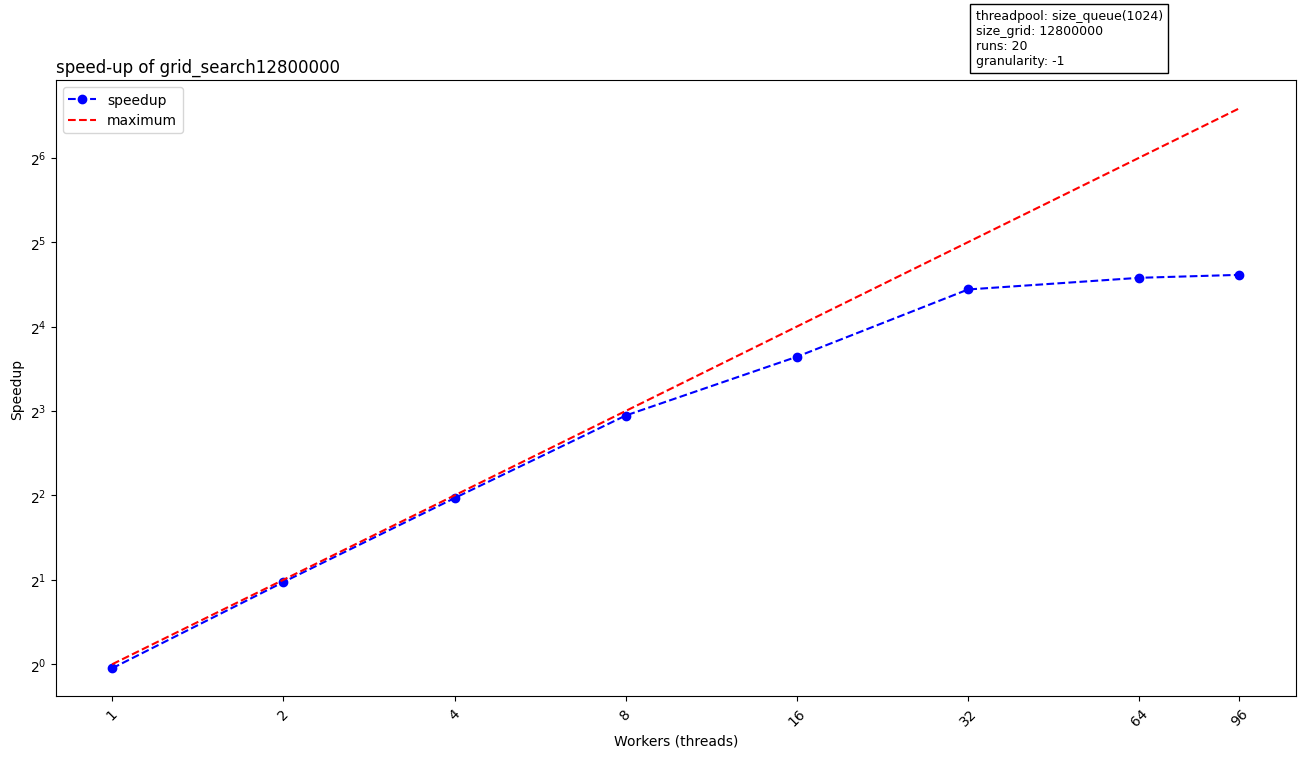

In [6]:
size_grid = 12800000  # puoi cambiare qui
dati_seq = globals()[f"grid_search_{size_grid}_seq"]
dati_parallel = []
for i in n_threads:
    dati_parallel.append(globals()[f"grid_search_{size_grid}_thread{i}"])
plot_boxplot(dati_seq, dati_parallel,"grid search",n_threads, size_grid)
data_list = []
data_list.append(dati_seq)
for i in range(len(n_threads)):
    data_list.append(dati_parallel[i])
plot_speedup(data_list,"speed-up of grid_search"+str(size_grid),n_threads,1024,size_grid,-1)

## scalabilità debole


In [7]:
def plot_boxplot_weak(data, title, n_threads, sizegrid, size_queue, granularity):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = data
    ticks = [f"{n},{s}" for n, s in zip(n_threads, sizegrid)]

    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel='n_thread, size_grid', ylabel='Microseconds')
    ax.set_title(title, loc='left')
    ax.set_xticks(range(1, len(boxs) + 1))
    ax.set_xticklabels(ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['blue'] * len(bplot['boxes'])
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [Patch(facecolor='blue', label='grid search parallel')]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, 
                f"threadpool: size_queue({size_queue})\nruns: {len(data[0])}\ngranularity: {granularity}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

    # Print delle mediane dei boxplot
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [8]:

def plot_efficiency(data, title, n_threads, sizegrid, size_queue, granularity):
    
    # Calcolo efficienza mediana / sequenziale
    seq_median = np.median(data[0])
    efficiencies = [seq_median / np.median(d) for d in data]
    
    # Prepara ticks
    ticks = [f"{n},{s}" for n, s in zip(n_threads, sizegrid)]
    
    fig, ax = plt.subplots(figsize=[10, 8])
    
    x = range(len(efficiencies))
    
    # Linea + pallini
    ax.plot(x, efficiencies, color='blue', marker='o', linestyle='-', markersize=8)
    
    ax.set(xlabel='n_thread, size_grid', ylabel='Efficiency')
    ax.set_title(title, loc='left')
    ax.set_xticks(x)
    ax.set_xticklabels(ticks)
    
    plt.figtext(0.63, 0.9, 
                f"threadpool: size_queue({size_queue})\nruns: {len(data[0])}\ngranularity: {granularity}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
    
    # Print delle efficienze mediane
    print("\n=== Median efficiencies ===")
    for label, eff in zip(ticks, efficiencies):
        print(f"{label}: {eff:.2f}")
    print("===========================\n")



=== Median values (µs) ===
1,400000: 17489.50
2,800000: 17229.00
4,1600000: 17032.50
8,3200000: 17147.00
16,6400000: 21190.00
32,12800000: 24208.00



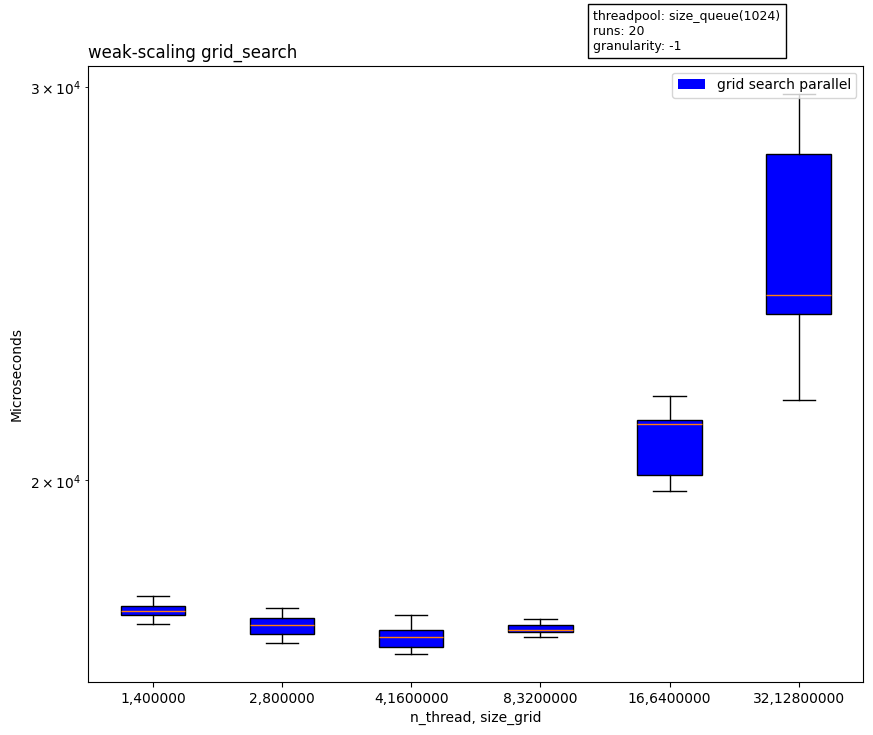

In [9]:
dati = []
#dati.append(grid_search_400000_thread1)
dati.append(grid_search_400000_thread1)
dati.append(grid_search_800000_thread2)
dati.append(grid_search_1600000_thread4)
dati.append(grid_search_3200000_thread8)
dati.append(grid_search_6400000_thread16)
dati.append(grid_search_12800000_thread32)
plot_boxplot_weak(dati,"weak-scaling grid_search",[1,2,4,8,16,32],[400000, 800000, 1600000, 3200000, 6400000,12800000],1024,-1)


=== Median efficiencies ===
1,400000: 1.00
2,800000: 1.02
4,1600000: 1.03
8,3200000: 1.02
16,6400000: 0.83
32,12800000: 0.72



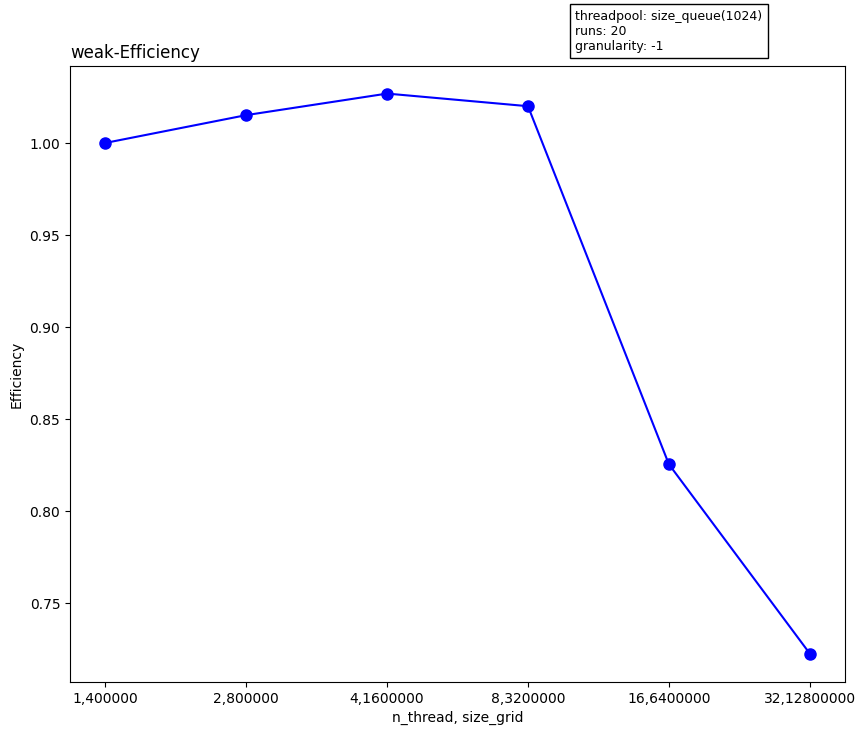

In [10]:
plot_efficiency(dati,"weak-Efficiency",[1,2,4,8,16,32],[400000, 800000, 1600000, 3200000, 6400000,12800000],1024,-1)

## weak efficency


## fix thread cambia granularity


In [57]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("sequential")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'granularity',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nsize_grid : {sizegrid}\nruns: {len(data_for)}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [58]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nsize_grid: {size_grid}\nruns:{len(data_list[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [53]:
granularity = [1000000,100000,10000,1000] 
size_grid = 6000000
n_thread = 6
size_queue = 1024 #hardcode ma tanto qui inutile

In [21]:
#run manualmente seq,   nruns sizegrid  (for per calcolo speedup)
!./run_optimization.sh 3 6000000

In [28]:
#run manualmente parallel cambiando granularity,   nruns sizegrid n_thread granularity 
!./run_optimization_parallel_fixthread_granularity.sh 3 6000000 6 1000000 

In [65]:
dati_seq = []
dati_seq =np.genfromtxt("test_optimization_sizegrid"+str(size_grid)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_optimization_sizegrid"+str(size_grid)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
sequential: 267298.50
1000000: 77303.00
100000: 70268.50
10000: 72489.50
1000: 80876.50



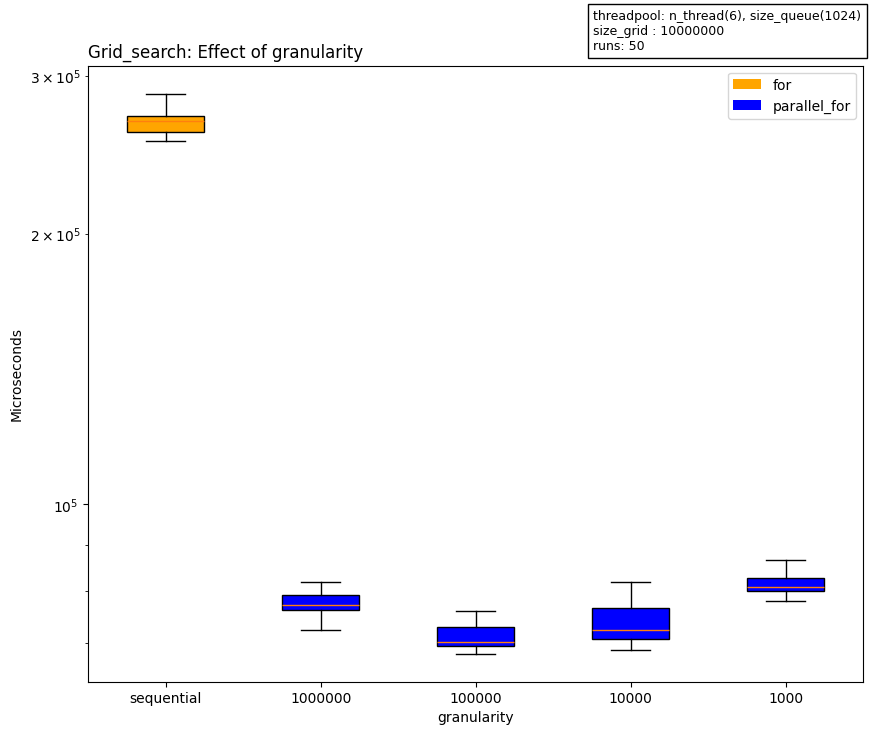

In [66]:
plot_granularity(dati_seq,dati_par,"Grid_search: Effect of granularity")


=== Speedup values ===
Granularity 1000: speedup = 3.31
Granularity 10000: speedup = 3.69
Granularity 100000: speedup = 3.80
Granularity 1000000: speedup = 3.46



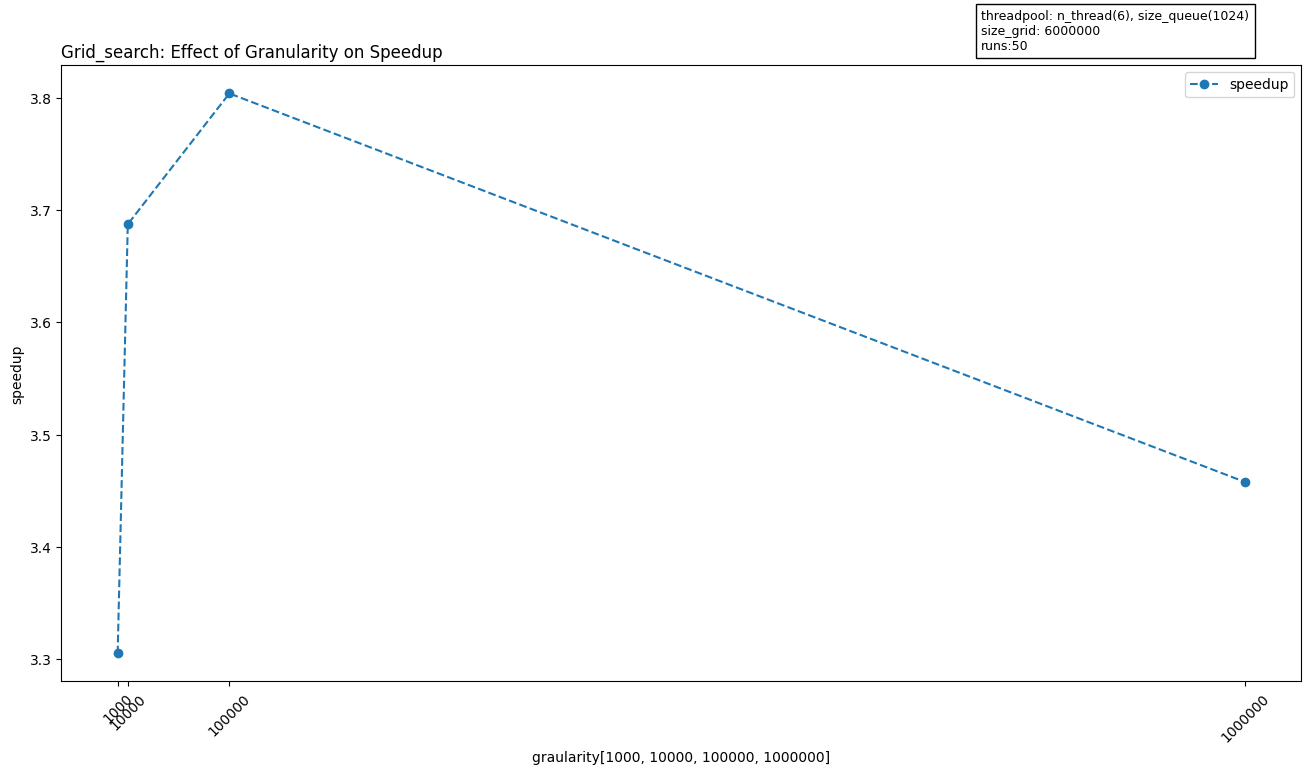

In [67]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Grid_search: Effect of Granularity on Speedup",granularity)